## See enso, ERA5 plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import xarray as xr
import cartopy.crs as ccrs
import plot_func as f

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
path = '/Users/johannemehren/filer/'

#path_remap = '/uio/hume/student-u62/johanmeh/Documents/Master/Data_from_Susann/new_data/remap/'

ds = xr.open_dataset(path + 'FULL-ERA5.monthmean.2007-2018.concat_new.nc')

In [4]:
era5_trop = ds.sel(lat=slice(-30,30))
era5_m = era5_trop.groupby('time.season').mean()

In [5]:
def enso_select(ds):

    nino1 = ds.sel(time=slice('2009-12-01', '2010-02-28'))
    nino2 = ds.sel(time=slice('2014-12-01', '2015-02-28'))
    nino3 = ds.sel(time=slice('2015-12-01', '2016-02-28'))
        
    nino = xr.concat([nino1, nino2, nino3], dim='time')
        

    nina1 = ds.sel(time=slice('2007-12-01', '2008-02-28'))
    nina2 = ds.sel(time=slice('2008-12-01', '2009-02-28'))
    nina3 = ds.sel(time=slice('2010-12-01', '2011-02-28'))
    nina4 = ds.sel(time=slice('2011-12-01', '2012-02-28'))
    nina5 = ds.sel(time=slice('2017-12-01', '2018-02-28'))

    nina = xr.concat([nina1, nina2, nina3, nina4, nina5], dim='time')
        
    return nino, nina
        
    

In [6]:
era5_nino, era5_nina = enso_select(era5_trop)

In [7]:
diff_cpt_nino = era5_nino.ctpt.mean(dim='time') - era5_m.ctpt[0,:,:]
diff_cpt_nina = era5_nina.ctpt.mean(dim='time') - era5_m.ctpt[0,:,:]

diff_cpz_nino = era5_nino.ctpz.mean(dim='time') - era5_m.ctpz[0,:,:]
diff_cpz_nina = era5_nina.ctpz.mean(dim='time') - era5_m.ctpz[0,:,:]

diff_lrt_nino = era5_nino.tpt.mean(dim='time') - era5_m.tpt[0,:,:]
diff_lrt_nina = era5_nina.tpt.mean(dim='time') - era5_m.tpt[0,:,:]

diff_lrz_nino = era5_nino.tpz.mean(dim='time') - era5_m.tpz[0,:,:]
diff_lrz_nina = era5_nina.tpz.mean(dim='time') - era5_m.tpz[0,:,:]


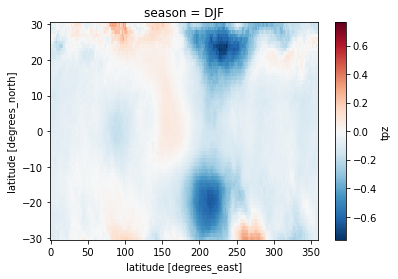

In [8]:
diff_lrz_nina.plot()

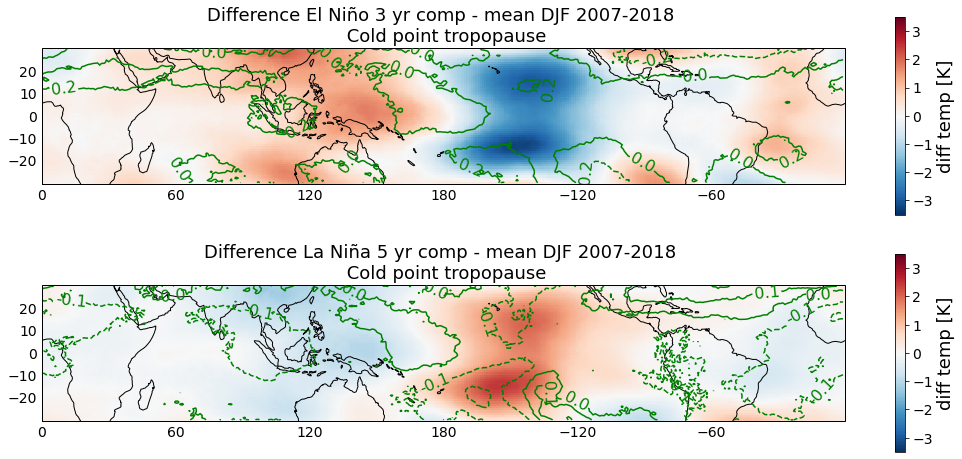

In [14]:
tl2 = 'Difference El Niño 3 yr comp - mean DJF 2007-2018 \n Cold point tropopause'
tl1 = 'Difference La Niña 5 yr comp - mean DJF 2007-2018 \n Cold point tropopause'

l=enso_maxmin(diff_cpt_nino, tl2, diff_cpz_nino,
              diff_cpt_nina,tl1, diff_cpz_nina,
              vmin = -3.5, vmax=3.5, label='diff temp [K]')
#l.savefig('figs/diff_era5_lael_mean_2007-2018_contour_reversed.png')

In [9]:
def enso_maxmin(ds1, tl1,cont1, ds2, tl2,cont2, vmin, vmax, label):
    proj = ccrs.PlateCarree(central_longitude = 180)
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 8), subplot_kw={'projection':proj})
    xticks = [-120, -60, 0, 60, 120, 180]
    yticks = [-20, -10, 0, 10, 20]
    cm = 'RdBu_r'
    font_size = 14

    #ax1 plot
    im1 = ds1.plot.pcolormesh(ax=ax1, cmap=cm,vmin=vmin, vmax=vmax,
                              transform=ccrs.PlateCarree(central_longitude=0),
                             add_colorbar=False)
    ctl1 = cont1.plot.contour(ax=ax1, levels = 6, colors = 'g', transform=ccrs.PlateCarree(central_longitude=0))
    ax1.clabel(ctl1, fmt='%1.1f', fontsize=16)
    cb1 = plt.colorbar(im1,ax=ax1)
    cb1.set_label(label=label, fontsize=18)
    font_size = 14 # Adjust as appropriate.
    cb1.ax.tick_params(labelsize=font_size)

    ax1.coastlines()
    gl = ax1.gridlines(xlocs=xticks, ylocs=yticks, draw_labels=True, alpha=0.01, color='gray', linestyle='--')
    gl.xlabels_top=False
    gl.ylabels_right=False
    ax1.set_title(tl1, fontsize = 18)
    gl.xlabel_style = {'size':14}
    gl.ylabel_style = {'size':14}

    # ax2 plot
    im2 = ds2.plot.pcolormesh(ax=ax2, cmap=cm, vmin = vmin, vmax=vmax,
                              transform=ccrs.PlateCarree(central_longitude=0),
                             add_colorbar=False)
    ctl2 = cont2.plot.contour(ax=ax2, levels = 6, colors = 'g', transform=ccrs.PlateCarree(central_longitude=0))
    ax2.clabel(ctl2, fmt='%1.1f', fontsize=16)
    cb2 = plt.colorbar(im2, ax=ax2)
    cb2.set_label(label=label, fontsize=18)
    font_size = 14 # Adjust as appropriate.
    cb2.ax.tick_params(labelsize=font_size)

    ax2.coastlines()
    gl  = ax2.gridlines(xlocs=xticks, ylocs=yticks, draw_labels= True, alpha = 0.01, color = 'gray', linestyle = '--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}
    ax2.set_title(tl2, fontsize = 18)

    return f

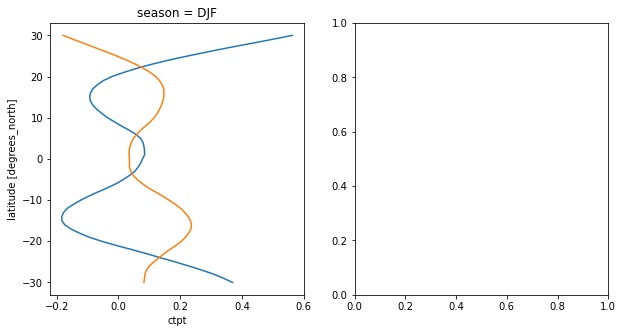

In [28]:
f, axs = plt.subplots(1,2, figsize=(10,5))
diff_cpt_nino.mean(dim='lon').plot(ax=axs[0], y='lat')
diff_cpt_nina.mean(dim='lon').plot(ax=axs[0], y = 'lat')

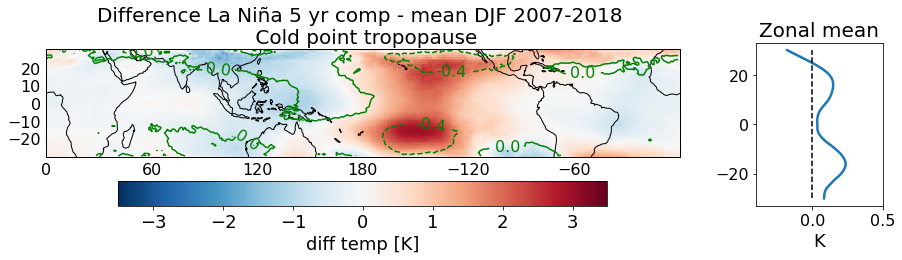

In [13]:
from matplotlib import gridspec
ds1 = diff_lrt_nina
tl1 = 'Difference La Niña 5 yr comp - mean DJF 2007-2018 \n Cold point tropopause'
cont1 = diff_lrz_nina
proj = ccrs.PlateCarree(central_longitude = 180)

xticks = [-120, -60, 0, 60, 120, 180]
yticks = [-20, -10, 0, 10, 20]
cm = 'RdBu_r'
font_size = 14
vmin = -3.5
vmax=3.5
label='diff temp [K]'


fig = plt.figure(figsize=(15, 3))
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[5, 1])

ax1 = plt.subplot(spec[0], projection=proj)
im1 = ds1.plot(ax=ax1, cmap=cm,vmin=vmin, vmax=vmax,
                             transform=ccrs.PlateCarree(central_longitude=0), add_colorbar=False)
ctl1 = cont1.plot.contour(ax=ax1, levels = 6, colors = 'g', transform=ccrs.PlateCarree(central_longitude=0))
ax1.clabel(ctl1, fmt='%1.1f', fontsize=16)
cb1 = plt.colorbar(im1,ax=ax1, orientation='horizontal')
cb1.set_label(label=label, fontsize=18)
font_size = 18 # Adjust as appropriate.
cb1.ax.tick_params(labelsize=font_size)

ax1.coastlines()
gl = ax1.gridlines(xlocs=xticks, ylocs=yticks, draw_labels=True, alpha=0.01, color='gray', linestyle='--')
gl.xlabels_top=False
gl.ylabels_right=False
ax1.set_title(tl1, fontsize = 20)
gl.xlabel_style = {'size':16}
gl.ylabel_style = {'size':16}

ax2 = fig.add_subplot(spec[1])
diff_cpt_nina.mean(dim='lon').plot(ax=ax2, y='lat', lw=2.5)
ax2.plot(np.zeros(61), diff_cpt_nina.lat, 'k--')
ax2.set_xlim(-0.4, 0.5)
ax2.set_ylabel("")
ax2.set_xlabel("K", fontsize=18)
ax2.set_title("Zonal mean", fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=16)

#fig.savefig('figs/zonalmean_era5_LA.png', dpi = 300)

In [30]:
diff_cpt_nina.sel(lat=(-20,20)).mean(dim=('lat', 'lon'))

<xarray.DataArray 'ctpt' ()>
array(0.16246007, dtype=float32)
Coordinates:
    season   <U3 'DJF'

In [31]:
diff_cpt_nino.sel(lat=(-20,20)).mean(dim=('lat', 'lon'))

<xarray.DataArray 'ctpt' ()>
array(-0.03777637, dtype=float32)
Coordinates:
    season   <U3 'DJF'

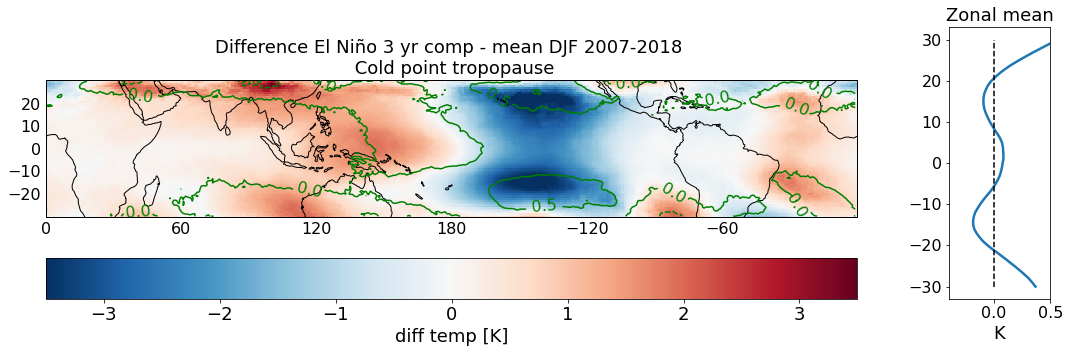

In [35]:
ds1 = diff_lrt_nino
tl1 = 'Difference El Niño 3 yr comp - mean DJF 2007-2018 \n Cold point tropopause'
cont1 = diff_lrz_nino
proj = ccrs.PlateCarree(central_longitude = 180)

xticks = [-120, -60, 0, 60, 120, 180]
yticks = [-20, -10, 0, 10, 20]
cm = 'RdBu_r'
font_size = 14
vmin = -3.5
vmax=3.5
label='diff temp [K]'


fig = plt.figure(figsize=(18, 5))
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[8, 1])

ax1 = plt.subplot(spec[0], projection=proj)
im1 = ds1.plot(ax=ax1, cmap=cm,vmin=vmin, vmax=vmax,
                             transform=ccrs.PlateCarree(central_longitude=0), add_colorbar=False)
ctl1 = cont1.plot.contour(ax=ax1, levels = 6, colors = 'g', transform=ccrs.PlateCarree(central_longitude=0))
ax1.clabel(ctl1, fmt='%1.1f', fontsize=16)
cb1 = plt.colorbar(im1,ax=ax1, orientation='horizontal')
cb1.set_label(label=label, fontsize=18)
font_size = 18 # Adjust as appropriate.
cb1.ax.tick_params(labelsize=font_size)

ax1.coastlines()
gl = ax1.gridlines(xlocs=xticks, ylocs=yticks, draw_labels=True, alpha=0.01, color='gray', linestyle='--')
gl.xlabels_top=False
gl.ylabels_right=False
ax1.set_title(tl1, fontsize = 18)
gl.xlabel_style = {'size':16}
gl.ylabel_style = {'size':16}

ax2 = fig.add_subplot(spec[1])
diff_cpt_nino.mean(dim='lon').plot(ax=ax2, y='lat', lw=2.5)
ax2.plot(np.zeros(61), diff_cpt_nino.lat, 'k--')
ax2.set_xlim(-0.4, 0.5)
ax2.set_ylabel("")
ax2.set_xlabel("K", fontsize=18)
ax2.set_title("Zonal mean", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=16)

#fig.savefig('figs/zonalmean_era5_EL.png', dpi = 300)